# Lesson: Working with Time Series Data

<hr style="border:2px solid gray">

In [3]:
#standard ds imports
import pandas as pd
import matplotlib.pyplot as plt

#specify visuals
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20

#ignore warnings import
import warnings
warnings.filterwarnings('ignore')

## Convertime to DateTime Type

In [1]:
#assign variable date
date = 'Jan 1 1970'

In [7]:
#find out what kind of datatype 'date' is
type(date)

str

<div class="alert alert-block alert-info">
<b>Note:</b>
<br>

Pandas does <u>not</u> understand that the 'date' we put in is an actual date and not a <b>string</b>.

<br>      
How do we get pandas to understand this date and work with it??    
<br>
    
We must convert our 'date' to a datetime using Pandas to_datetime
</div>

In [4]:
#use pandas to_datetime to convert
pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

<div class="alert alert-block alert-info">
<b>Note:</b>
<br>
Sometimes pandas isn't able to infer the format of our date so we need to tell pandas what format to use for our date

In [8]:
try:
    pd.to_datetime('Jan:1:1970')
except ValueError as e:
    print('ValueError', e)

ValueError Unknown string format: Jan:1:1970


In [9]:
#tell pandas the format we need for our date
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

<b>There are all sorts of format codes and you can find them here</b>: 
[Pandas Datetime format](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

<hr style="border:2px solid black">

## What about a whole column of dates?

In [10]:
#assign url variable
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"

#read in csv of the url above
df = pd.read_csv(url)

#find the datatypes for each column
print(df.dtypes)

#take a look at the dataframe
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


### using ```pd.to_datetime```

In [4]:
df['date'] = pd.to_datetime(df['date'])

df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

### using ``` .dt```
- This allows us to extract parts of the date

In [5]:
#extract day
df['date'].dt.day

0       1
1       2
2       3
3       4
4       7
       ..
256    25
257    26
258    27
259    30
260    31
Name: date, Length: 261, dtype: int64

In [6]:
#extract month
df['date'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
256    12
257    12
258    12
259    12
260    12
Name: date, Length: 261, dtype: int64

In [9]:
#create a column by extracting day name
df['day_of_week'] = df['date'].dt.day_name()

#take a look
df.head()

,date,coffee_consumption,day_of_week
0,2019-01-01,14.301915,Tuesday
1,2019-01-02,12.905900,Wednesday
2,2019-01-03,10.046015,Thursday
3,2019-01-04,6.354805,Friday
4,2019-01-07,8.545563,Monday


In [12]:
#reset the index as the date
df = df.set_index('date')

#take a look
df.head()

,coffee_consumption,day_of_week
date,,
2019-01-01,14.301915,Tuesday
2019-01-02,12.905900,Wednesday
2019-01-03,10.046015,Thursday
2019-01-04,6.354805,Friday
2019-01-07,8.545563,Monday


###  using ```asfreq``` to resample

In [18]:
fill_df = df.asfreq('D')
fill_df

,coffee_consumption,day_of_week
date,,
2019-01-01,14.301915,Tuesday
2019-01-02,12.905900,Wednesday
2019-01-03,10.046015,Thursday
2019-01-04,6.354805,Friday
2019-01-05,NaN,NaN
...,...,...
2019-12-27,9.464345,Friday
2019-12-28,NaN,NaN
2019-12-29,NaN,NaN


In [17]:
df.asfreq('M')

,coffee_consumption,day_of_week
date,,
2019-01-31,9.035046,Thursday
2019-02-28,9.093397,Thursday
2019-03-31,NaN,NaN
2019-04-30,7.086039,Tuesday
2019-05-31,10.818797,Friday
2019-06-30,NaN,NaN
2019-07-31,10.790037,Wednesday
2019-08-31,NaN,NaN
2019-09-30,11.282275,Monday


In [21]:
df.resample('5D').mean()

,coffee_consumption
date,
2019-01-01,10.902159
2019-01-06,8.628348
2019-01-11,10.941607
2019-01-16,10.124445
2019-01-21,9.690260
...,...
2019-12-07,10.418495
2019-12-12,11.798295
2019-12-17,9.251785


### using  ``` forward``` and ```back fill```

In [24]:
fill_df['forward'] = fill_df['coffee_consumption'].ffill()

In [25]:
fill_df['backward'] = fill_df['coffee_consumption'].bfill()

In [26]:
fill_df.head(10)

,coffee_consumption,day_of_week,forward,backward
date,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915
2019-01-02,12.905900,Wednesday,12.905900,12.905900
2019-01-03,10.046015,Thursday,10.046015,10.046015
2019-01-04,6.354805,Friday,6.354805,6.354805
2019-01-05,NaN,NaN,6.354805,8.545563
2019-01-06,NaN,NaN,6.354805,8.545563
2019-01-07,8.545563,Monday,8.545563,8.545563
2019-01-08,9.410101,Tuesday,9.410101,9.410101
2019-01-09,7.219271,Wednesday,7.219271,7.219271


In [27]:
fill_df['day_of_week'] = fill_df.index.day_name()
fill_df.head(10)

,coffee_consumption,day_of_week,forward,backward
date,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915
2019-01-02,12.905900,Wednesday,12.905900,12.905900
2019-01-03,10.046015,Thursday,10.046015,10.046015
2019-01-04,6.354805,Friday,6.354805,6.354805
2019-01-05,NaN,Saturday,6.354805,8.545563
2019-01-06,NaN,Sunday,6.354805,8.545563
2019-01-07,8.545563,Monday,8.545563,8.545563
2019-01-08,9.410101,Tuesday,9.410101,9.410101
2019-01-09,7.219271,Wednesday,7.219271,7.219271


In [30]:
fill_df['coffee_consumption'] = fill_df['coffee_consumption'].fillna(0)
fill_df.head()

,coffee_consumption,day_of_week,forward,backward
date,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915
2019-01-02,12.905900,Wednesday,12.905900,12.905900
2019-01-03,10.046015,Thursday,10.046015,10.046015
2019-01-04,6.354805,Friday,6.354805,6.354805
2019-01-05,0.000000,Saturday,6.354805,8.545563


### Now, let's plot our data

<AxesSubplot:xlabel='date'>

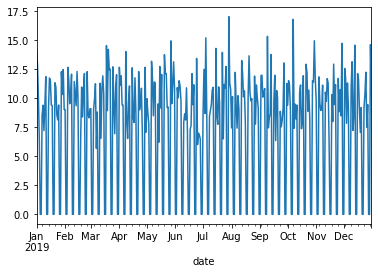

In [31]:
fill_df['coffee_consumption'].plot()

<AxesSubplot:xlabel='date'>

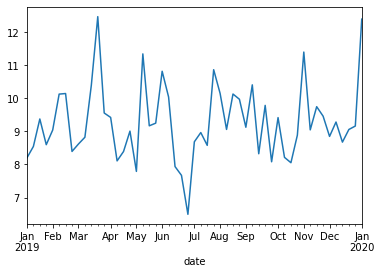

In [34]:
fill_df.resample('W').median()['coffee_consumption'].plot()

<AxesSubplot:xlabel='date'>

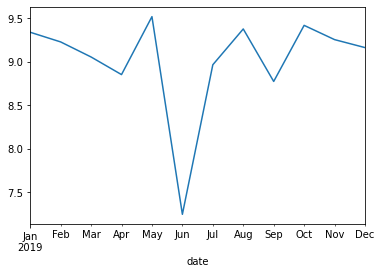

In [35]:
fill_df.resample('M').median()['coffee_consumption'].plot()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1244: UserWarning: Attempting to set identical left == right == 49.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


<AxesSubplot:xlabel='date'>

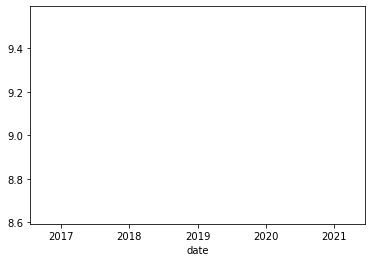

In [36]:
fill_df.resample('Y').median()['coffee_consumption'].plot()

### rolling

In [38]:
fill_df['rolling_week_avg'] = fill_df['coffee_consumption'].rolling(7).mean()
fill_df.head(10)

,coffee_consumption,day_of_week,forward,backward,rolling_week_avg
date,,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915,NaN
2019-01-02,12.905900,Wednesday,12.905900,12.905900,NaN
2019-01-03,10.046015,Thursday,10.046015,10.046015,NaN
2019-01-04,6.354805,Friday,6.354805,6.354805,NaN
2019-01-05,0.000000,Saturday,6.354805,8.545563,NaN
2019-01-06,0.000000,Sunday,6.354805,8.545563,NaN
2019-01-07,8.545563,Monday,8.545563,8.545563,7.450600
2019-01-08,9.410101,Tuesday,9.410101,9.410101,6.751769
2019-01-09,7.219271,Wednesday,7.219271,7.219271,5.939394


In [39]:
fill_df['coffee_consumption'].rolling(3).sum()

date
2019-01-01          NaN
2019-01-02          NaN
2019-01-03    37.253830
2019-01-04    29.306721
2019-01-05    16.400821
                ...    
2019-12-27    29.228426
2019-12-28    16.977551
2019-12-29     9.464345
2019-12-30    14.623106
2019-12-31    24.791422
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

### using ```strftime```

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [41]:
fill_df.index.strftime('%A, %B %Y')

Index(['Tuesday, January 2019', 'Wednesday, January 2019',
       'Thursday, January 2019', 'Friday, January 2019',
       'Saturday, January 2019', 'Sunday, January 2019',
       'Monday, January 2019', 'Tuesday, January 2019',
       'Wednesday, January 2019', 'Thursday, January 2019',
       ...
       'Sunday, December 2019', 'Monday, December 2019',
       'Tuesday, December 2019', 'Wednesday, December 2019',
       'Thursday, December 2019', 'Friday, December 2019',
       'Saturday, December 2019', 'Sunday, December 2019',
       'Monday, December 2019', 'Tuesday, December 2019'],
      dtype='object', name='date', length=365)

### using ``` timedeltas```

In [42]:
fill_df.index.min(), fill_df.index.max()

(Timestamp('2019-01-01 00:00:00', freq='D'),
 Timestamp('2019-12-31 00:00:00', freq='D'))

In [43]:
fill_df.index.max() - fill_df.index.min()

Timedelta('364 days 00:00:00')

### using ```idxmax``` and ```idxmin```

In [44]:
fill_df['coffee_consumption'].idxmax()

Timestamp('2019-07-29 00:00:00', freq='D')

In [45]:
fill_df['coffee_consumption'].max()

17.0434447448351

In [46]:
fill_df['coffee_consumption'].idxmin()

Timestamp('2019-01-05 00:00:00', freq='D')